In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')
X_train.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',VehicleType_'05 - Light Duty Truck',...,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol,ViolationType_SERO,ViolationType_Warning
47831,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6309,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
34433,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
58652,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
51569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


# Normalizacija

Za normalizaciju ćemo iskoristiti MinMaxScaler Vrednosti min i max ćemo odrediti na osnovu trening skupa, a zatim primeniti transformaciju na test i trening skup.

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
def report(model, X, y, text = "training"):
    y_pred = model.predict(X)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Nije izazvao nezgodu', 'Izazvao je nezgodu'], index=['0', '1']))
    print("---------------------------------------------------------------------------------")

## KNN

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
report(knn, X_train, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47572
           1       0.87      0.06      0.12      1171

    accuracy                           0.98     48743
   macro avg       0.93      0.53      0.55     48743
weighted avg       0.97      0.98      0.97     48743

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47561                  11
1                  1095                  76
---------------------------------------------------------------------------------


In [29]:
report(knn, X_test, y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20389
           1       0.25      0.00      0.01       502

    accuracy                           0.98     20891
   macro avg       0.61      0.50      0.50     20891
weighted avg       0.96      0.98      0.96     20891

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 20383                   6
1                   500                   2
---------------------------------------------------------------------------------


Probaćemo da unapredimo model podešavanjem hiper-parametara.

# Podešavanje hiper-parametara

## Grid Search CV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [30]:
params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

estimator = GridSearchCV(KNeighborsClassifier(), param_grid = params, cv=5)

In [32]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [33]:
estimator.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [34]:
estimator.best_score_

0.9761196491518568

In [35]:
report(estimator.best_estimator_, X_train, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47572
           1       0.87      0.06      0.12      1171

    accuracy                           0.98     48743
   macro avg       0.93      0.53      0.55     48743
weighted avg       0.97      0.98      0.97     48743

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47561                  11
1                  1095                  76
---------------------------------------------------------------------------------


In [36]:
report(estimator.best_estimator_, X_test, y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20389
           1       0.25      0.00      0.01       502

    accuracy                           0.98     20891
   macro avg       0.61      0.50      0.50     20891
weighted avg       0.96      0.98      0.96     20891

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 20383                   6
1                   500                   2
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate unakrsne validacije.

In [37]:
estimator.cv_results_

{'mean_fit_time': array([0.03617601, 0.04219298, 0.03766437, 0.0445426 , 0.03431768,
        0.04353828, 0.03604517, 0.04250731, 0.03898983, 0.04125748,
        0.03889098, 0.0463613 ]),
 'std_fit_time': array([0.00673013, 0.00471338, 0.00356185, 0.00777042, 0.00441866,
        0.00479626, 0.00512179, 0.00666436, 0.00509611, 0.00418745,
        0.00592499, 0.0020709 ]),
 'mean_score_time': array([7.93978581, 7.98531294, 1.15451975, 0.96627369, 7.96770616,
        7.94924335, 1.10832844, 0.96046686, 7.98736005, 7.6638423 ,
        1.22428298, 1.02058501]),
 'std_score_time': array([0.05974301, 0.41718411, 0.05718351, 0.05416043, 0.09551218,
        0.10449928, 0.00907136, 0.05588415, 0.09106043, 0.09153913,
        0.04466829, 0.06105477]),
 'param_n_neighbors': masked_array(data=[3, 3, 3, 3, 5, 5, 5, 5, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=

## Slučajne šume

In [38]:
baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train, y_train)

report(baggingKnn, X_train, y_train)
report(baggingKnn, X_test, y_test, "test")

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47572
           1       0.93      0.04      0.08      1171

    accuracy                           0.98     48743
   macro avg       0.95      0.52      0.54     48743
weighted avg       0.98      0.98      0.97     48743

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47568                   4
1                  1120                  51
---------------------------------------------------------------------------------
Classification report for model BaggingClassifier on test data
--------------------

# Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. Za poređenje koristimo ROC krivu.

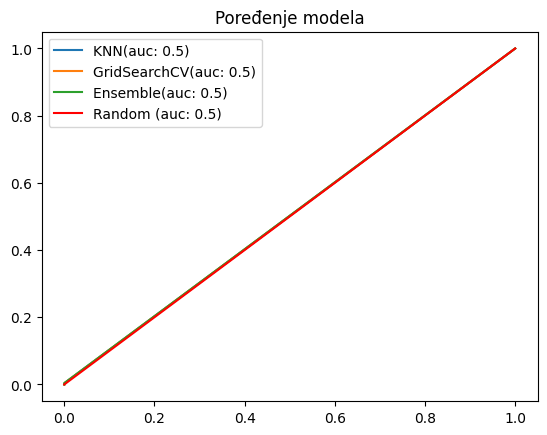

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_, baggingKnn]
model_names = ['KNN', 'GridSearchCV', 'Ensemble']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()